# Presidential Poll Analysis
### By August Money

## Overview
This project is just to create a tool for analyzing polling data being pulled from FiveThirtyEight

## Key States
- Arizona
- Colorado
- Florida
- Georgia
- Michigan
- Minnesota
- Nebraska CD-2
- New Hampshire
- Nevada
- North Carolina
- Ohio
- Pennsylvania
- Texas
- Wisconsin

In [1]:
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go

In [2]:
csv_path = Path("./data/polls/president_polls.csv")

In [3]:
pp_df = pd.read_csv(csv_path)

# Total Number of Polls

In [4]:
total_polls = pp_df.groupby("candidate_name").size()
total_polls

candidate_name
Alexandria Ocasio-Cortez       1
Alyson Kennedy                 1
Amy Klobuchar                 76
Andrew Cuomo                   1
Andrew Yang                   16
Barack Obama                   1
Bernard Sanders              435
Beto O'Rourke                 59
Bill de Blasio                 5
Brock Pierce                   5
Charles E. Schumer             1
Cory A. Booker                34
Don Blankenship               15
Donald Trump                6465
Elizabeth Warren             348
Eric Swalwell                  3
Gloria La Riva                 2
Hillary Rodham Clinton         4
Howard Schultz                30
Howie Hawkins                301
Jacob Hornberger               2
Jade Simmons                   3
Jay Robert Inslee              6
Jo Jorgensen                 415
John Hickenlooper              6
John K. Delaney                7
Joseph R. Biden Jr.         4952
Julián Castro                 17
Justin Amash                  13
Kamala D. Harris            

# Donald Trump Polls

In [5]:
djt = pp_df.where(pp_df["candidate_name"]=="Donald Trump")
djt.dropna(how='all', inplace=True)
djt.reset_index(inplace=True)
djt.drop(["index", "question_id", "pollster_id", "poll_id", "sponsor_ids", "notes", "url", "candidate_id", "tracking", "nationwide_batch", "ranked_choice_reallocated", "sponsor_candidate", "internal", "partisan", "election_date", "seat_name", "seat_number", "office_type", "created_at"], axis=1, inplace=True)
djt.head(10)

,cycle,state,pollster,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,start_date,end_date,stage,race_id,answer,candidate_name,candidate_party,pct
0,2020.0,South Carolina,Starboard Communications,NaN,Starboard Communications,316.0,Starboard Communications,B/C,800.0,lv,lv,NaN,10/26/20,10/26/20,general,6251.0,Trump,Donald Trump,REP,51.2
1,2020.0,Pennsylvania,Civiqs,Daily Kos,Civiqs,471.0,Civiqs,B/C,1145.0,lv,lv,Online,10/23/20,10/26/20,general,6249.0,Trump,Donald Trump,REP,45.0
2,2020.0,Georgia,Civiqs,Daily Kos,Civiqs,471.0,Civiqs,B/C,1041.0,lv,lv,Online,10/23/20,10/26/20,general,6221.0,Trump,Donald Trump,REP,46.0
3,2020.0,Mississippi,Civiqs,Daily Kos,Civiqs,471.0,Civiqs,B/C,507.0,lv,lv,Online,10/23/20,10/26/20,general,6236.0,Trump,Donald Trump,REP,55.0
4,2020.0,NaN,IBD/TIPP,NaN,IBD/TIPP,144.0,IBD/TIPP,A/B,970.0,lv,lv,Live Phone/Online,10/22/20,10/26/20,general,6210.0,Trump,Donald Trump,REP,46.3
5,2020.0,NaN,IBD/TIPP,NaN,IBD/TIPP,144.0,IBD/TIPP,A/B,970.0,lv,lv,Live Phone/Online,10/22/20,10/26/20,general,6210.0,Trump,Donald Trump,REP,45.8
6,2020.0,Wisconsin,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,664.0,lv,lv,Online,10/20/20,10/26/20,general,6259.0,Trump,Donald Trump,REP,44.0
7,2020.0,Wisconsin,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,664.0,lv,lv,Online,10/20/20,10/26/20,general,6259.0,Trump,Donald Trump,REP,44.0
8,2020.0,Pennsylvania,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,655.0,lv,lv,Online,10/20/20,10/26/20,general,6249.0,Trump,Donald Trump,REP,45.0
9,2020.0,Pennsylvania,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,655.0,lv,lv,Online,10/20/20,10/26/20,general,6249.0,Trump,Donald Trump,REP,44.0


In [6]:
djt.groupby("state").size()

state
Alabama                  49
Alaska                   49
Arizona                 184
Arkansas                 38
California              125
Colorado                 69
Connecticut              51
Delaware                 43
District of Columbia     36
Florida                 194
Georgia                 127
Hawaii                   38
Idaho                    37
Illinois                 37
Indiana                  42
Iowa                    116
Kansas                   52
Kentucky                 54
Louisiana                40
Maine                    69
Maine CD-1               16
Maine CD-2               18
Maryland                 50
Massachusetts            46
Michigan                242
Minnesota                75
Mississippi              43
Missouri                 61
Montana                  64
Nebraska                 36
Nebraska CD-1             1
Nebraska CD-2             6
Nevada                   76
New Hampshire           100
New Jersey               60
New Mexico    

In [7]:
djt_states = djt["state"].unique()
djt_states

array(['South Carolina', 'Pennsylvania', 'Georgia', 'Mississippi', nan,
       'Wisconsin', 'Florida', 'Texas', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'South Dakota', 'Oregon', 'Oklahoma',
       'Nevada', 'New Mexico', 'New Hampshire', 'North Dakota', 'Montana',
       'Missouri', 'Michigan', 'Maine', 'Maryland', 'Massachusetts',
       'Louisiana', 'Kansas', 'Indiana', 'Idaho', 'Iowa', 'Hawaii',
       'Delaware', 'Connecticut', 'Colorado', 'Arkansas', 'Alaska',
       'Washington', 'Utah', 'Tennessee', 'Rhode Island', 'Ohio',
       'New York', 'New Jersey', 'Nebraska', 'North Carolina',
       'Minnesota', 'Kentucky', 'Illinois', 'District of Columbia',
       'California', 'Arizona', 'Alabama', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2', 'Nebraska CD-1'], dtype=object)

In [8]:
djt_state_polls = {}
for state in djt_states:
    if isinstance(state, float):
        djt_state_polls["US"] = djt.where(djt["state"]==state)
        djt_state_polls["US"].dropna(how='all', inplace=True)
    else:
        djt_state_polls[state] = djt.where(djt["state"]==state)
        djt_state_polls[state].dropna(how='all', inplace=True)

In [9]:
djt_state_polls.keys()

dict_keys(['South Carolina', 'Pennsylvania', 'Georgia', 'Mississippi', 'US', 'Wisconsin', 'Florida', 'Texas', 'Wyoming', 'West Virginia', 'Vermont', 'Virginia', 'South Dakota', 'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Hampshire', 'North Dakota', 'Montana', 'Missouri', 'Michigan', 'Maine', 'Maryland', 'Massachusetts', 'Louisiana', 'Kansas', 'Indiana', 'Idaho', 'Iowa', 'Hawaii', 'Delaware', 'Connecticut', 'Colorado', 'Arkansas', 'Alaska', 'Washington', 'Utah', 'Tennessee', 'Rhode Island', 'Ohio', 'New York', 'New Jersey', 'Nebraska', 'North Carolina', 'Minnesota', 'Kentucky', 'Illinois', 'District of Columbia', 'California', 'Arizona', 'Alabama', 'Maine CD-1', 'Maine CD-2', 'Nebraska CD-2', 'Nebraska CD-1'])

In [37]:
djt_texas = pd.concat([pd.to_datetime(djt_state_polls["Texas"]["start_date"]), pd.to_datetime(djt_state_polls["Texas"]["end_date"]), djt_state_polls["Texas"]["pollster"], djt_state_polls["Texas"]["fte_grade"], djt_state_polls["Texas"]["sample_size"], djt_state_polls["Texas"]["pct"]], axis=1)
djt_texas.reset_index(inplace=True)
djt_texas.drop(["index"], axis=1, inplace=True)
djt_texas.head(10)

,start_date,end_date,pollster,fte_grade,sample_size,pct
0,2020-10-22,2020-10-25,Data for Progress,B-,1018.0,48.0
1,2020-10-20,2020-10-25,Siena College/The New York Times Upshot,A+,802.0,47.0
2,2020-09-27,2020-10-25,SurveyMonkey,D-,14571.0,48.0
3,2020-09-27,2020-10-25,SurveyMonkey,D-,14571.0,50.0
4,2020-09-26,2020-10-24,SurveyMonkey,D-,14490.0,48.0
5,2020-09-26,2020-10-24,SurveyMonkey,D-,14490.0,51.0
6,2020-09-26,2020-10-23,SurveyMonkey,D-,14436.0,48.0
7,2020-09-26,2020-10-23,SurveyMonkey,D-,14436.0,51.0
8,2020-09-25,2020-10-22,SurveyMonkey,D-,14434.0,48.0
9,2020-09-25,2020-10-22,SurveyMonkey,D-,14434.0,51.0


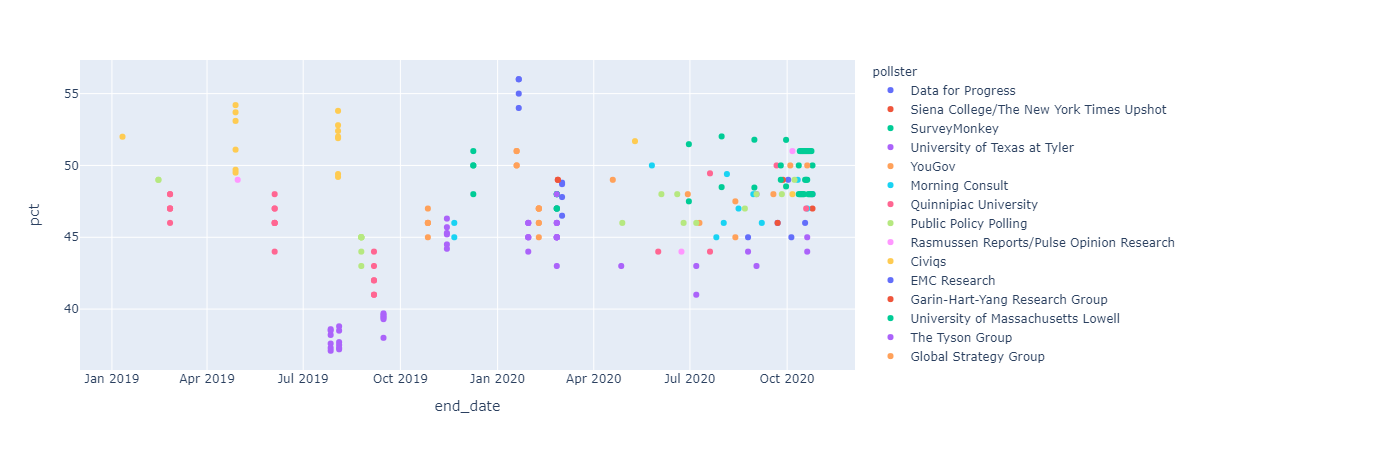

In [38]:
djt_tx_scatter = px.scatter(djt_texas, y="pct", x="end_date", color="pollster")
djt_tx_scatter.show()

# Joe Biden

In [10]:
jb = pp_df.where(pp_df["candidate_name"]=="Joseph R. Biden Jr.")
jb.dropna(how='all', inplace=True)
jb.reset_index(inplace=True)
jb.drop(["index", "question_id", "pollster_id", "poll_id", "sponsor_ids", "notes", "url", "candidate_id", "tracking", "nationwide_batch", "ranked_choice_reallocated", "sponsor_candidate", "internal", "partisan", "election_date", "seat_name", "seat_number", "office_type", "created_at"], axis=1, inplace=True)
jb.head(10)

,cycle,state,pollster,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,start_date,end_date,stage,race_id,answer,candidate_name,candidate_party,pct
0,2020.0,South Carolina,Starboard Communications,NaN,Starboard Communications,316.0,Starboard Communications,B/C,800.0,lv,lv,NaN,10/26/20,10/26/20,general,6251.0,Biden,Joseph R. Biden Jr.,DEM,43.9
1,2020.0,Pennsylvania,Civiqs,Daily Kos,Civiqs,471.0,Civiqs,B/C,1145.0,lv,lv,Online,10/23/20,10/26/20,general,6249.0,Biden,Joseph R. Biden Jr.,DEM,52.0
2,2020.0,Georgia,Civiqs,Daily Kos,Civiqs,471.0,Civiqs,B/C,1041.0,lv,lv,Online,10/23/20,10/26/20,general,6221.0,Biden,Joseph R. Biden Jr.,DEM,51.0
3,2020.0,Mississippi,Civiqs,Daily Kos,Civiqs,471.0,Civiqs,B/C,507.0,lv,lv,Online,10/23/20,10/26/20,general,6236.0,Biden,Joseph R. Biden Jr.,DEM,41.0
4,2020.0,NaN,IBD/TIPP,NaN,IBD/TIPP,144.0,IBD/TIPP,A/B,970.0,lv,lv,Live Phone/Online,10/22/20,10/26/20,general,6210.0,Biden,Joseph R. Biden Jr.,DEM,50.7
5,2020.0,NaN,IBD/TIPP,NaN,IBD/TIPP,144.0,IBD/TIPP,A/B,970.0,lv,lv,Live Phone/Online,10/22/20,10/26/20,general,6210.0,Biden,Joseph R. Biden Jr.,DEM,50.4
6,2020.0,Wisconsin,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,664.0,lv,lv,Online,10/20/20,10/26/20,general,6259.0,Biden,Joseph R. Biden Jr.,DEM,53.0
7,2020.0,Wisconsin,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,664.0,lv,lv,Online,10/20/20,10/26/20,general,6259.0,Biden,Joseph R. Biden Jr.,DEM,53.0
8,2020.0,Pennsylvania,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,655.0,lv,lv,Online,10/20/20,10/26/20,general,6249.0,Biden,Joseph R. Biden Jr.,DEM,50.0
9,2020.0,Pennsylvania,Ipsos,Reuters,Ipsos,154.0,Ipsos,B-,655.0,lv,lv,Online,10/20/20,10/26/20,general,6249.0,Biden,Joseph R. Biden Jr.,DEM,51.0


In [11]:
jb.groupby("state").size()

state
Alabama                  44
Alaska                   45
Arizona                 146
Arkansas                 38
California               69
Colorado                 60
Connecticut              42
Delaware                 39
District of Columbia     36
Florida                 154
Georgia                 104
Hawaii                   38
Idaho                    37
Illinois                 37
Indiana                  42
Iowa                     83
Kansas                   48
Kentucky                 51
Louisiana                40
Maine                    60
Maine CD-1               12
Maine CD-2               14
Maryland                 43
Massachusetts            44
Michigan                178
Minnesota                71
Mississippi              42
Missouri                 51
Montana                  55
Nebraska                 36
Nebraska CD-1             1
Nebraska CD-2             6
Nevada                   55
New Hampshire            62
New Jersey               50
New Mexico    

In [12]:
jb_states = jb["state"].unique()
jb_states

array(['South Carolina', 'Pennsylvania', 'Georgia', 'Mississippi', nan,
       'Wisconsin', 'Florida', 'Texas', 'Wyoming', 'West Virginia',
       'Vermont', 'Virginia', 'South Dakota', 'Oregon', 'Oklahoma',
       'Nevada', 'New Mexico', 'New Hampshire', 'North Dakota', 'Montana',
       'Missouri', 'Michigan', 'Maine', 'Maryland', 'Massachusetts',
       'Louisiana', 'Kansas', 'Indiana', 'Idaho', 'Iowa', 'Hawaii',
       'Delaware', 'Connecticut', 'Colorado', 'Arkansas', 'Alaska',
       'Washington', 'Utah', 'Tennessee', 'Rhode Island', 'Ohio',
       'New York', 'New Jersey', 'Nebraska', 'North Carolina',
       'Minnesota', 'Kentucky', 'Illinois', 'District of Columbia',
       'California', 'Arizona', 'Alabama', 'Maine CD-1', 'Maine CD-2',
       'Nebraska CD-2', 'Nebraska CD-1'], dtype=object)

In [13]:
jb_state_polls = {}
for state in jb_states:
    if isinstance(state, float):
        jb_state_polls["US"] = jb.where(jb["state"]==state)
        jb_state_polls["US"].dropna(how='all', inplace=True)
    else:
        jb_state_polls[state] = jb.where(jb["state"]==state)
        jb_state_polls[state].dropna(how='all', inplace=True)

In [14]:
jb_state_polls.keys()

dict_keys(['South Carolina', 'Pennsylvania', 'Georgia', 'Mississippi', 'US', 'Wisconsin', 'Florida', 'Texas', 'Wyoming', 'West Virginia', 'Vermont', 'Virginia', 'South Dakota', 'Oregon', 'Oklahoma', 'Nevada', 'New Mexico', 'New Hampshire', 'North Dakota', 'Montana', 'Missouri', 'Michigan', 'Maine', 'Maryland', 'Massachusetts', 'Louisiana', 'Kansas', 'Indiana', 'Idaho', 'Iowa', 'Hawaii', 'Delaware', 'Connecticut', 'Colorado', 'Arkansas', 'Alaska', 'Washington', 'Utah', 'Tennessee', 'Rhode Island', 'Ohio', 'New York', 'New Jersey', 'Nebraska', 'North Carolina', 'Minnesota', 'Kentucky', 'Illinois', 'District of Columbia', 'California', 'Arizona', 'Alabama', 'Maine CD-1', 'Maine CD-2', 'Nebraska CD-2', 'Nebraska CD-1'])

## Texas

In [15]:
jb_texas = pd.concat([pd.to_datetime(jb_state_polls["Texas"]["start_date"]), pd.to_datetime(jb_state_polls["Texas"]["end_date"]), jb_state_polls["Texas"]["pollster"], jb_state_polls["Texas"]["fte_grade"], jb_state_polls["Texas"]["sample_size"], jb_state_polls["Texas"]["pct"]], axis=1)
jb_texas.reset_index(inplace=True)
jb_texas.drop(["index"], axis=1, inplace=True)
jb_texas.head(10)

,start_date,end_date,pollster,fte_grade,sample_size,pct
0,2020-10-22,2020-10-25,Data for Progress,B-,1018.0,49.0
1,2020-10-20,2020-10-25,Siena College/The New York Times Upshot,A+,802.0,43.0
2,2020-09-27,2020-10-25,SurveyMonkey,D-,14571.0,49.0
3,2020-09-27,2020-10-25,SurveyMonkey,D-,14571.0,48.0
4,2020-09-26,2020-10-24,SurveyMonkey,D-,14490.0,49.0
5,2020-09-26,2020-10-24,SurveyMonkey,D-,14490.0,48.0
6,2020-09-26,2020-10-23,SurveyMonkey,D-,14436.0,49.0
7,2020-09-26,2020-10-23,SurveyMonkey,D-,14436.0,47.0
8,2020-09-25,2020-10-22,SurveyMonkey,D-,14434.0,49.0
9,2020-09-25,2020-10-22,SurveyMonkey,D-,14434.0,47.0


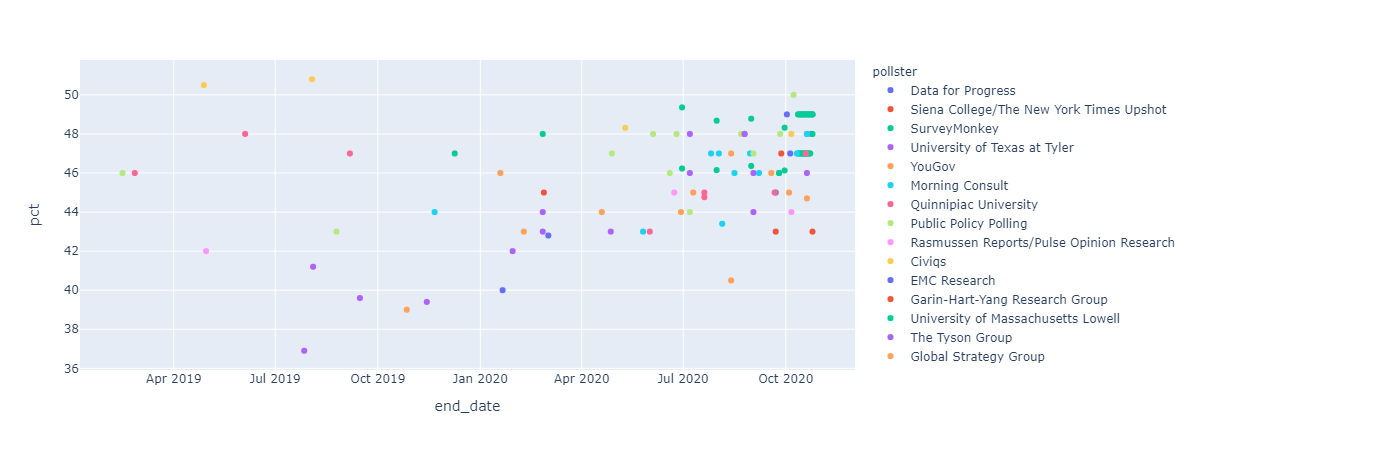

In [33]:
jb_tx_scatter = px.scatter(jb_texas, y="pct", x="end_date", color="pollster")
jb_tx_scatter.show()

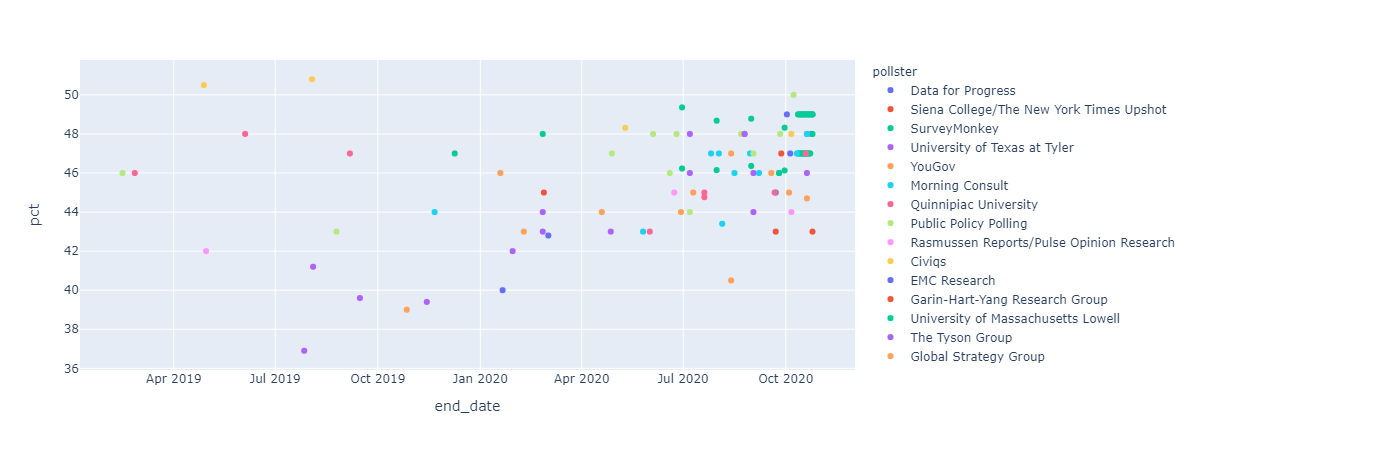

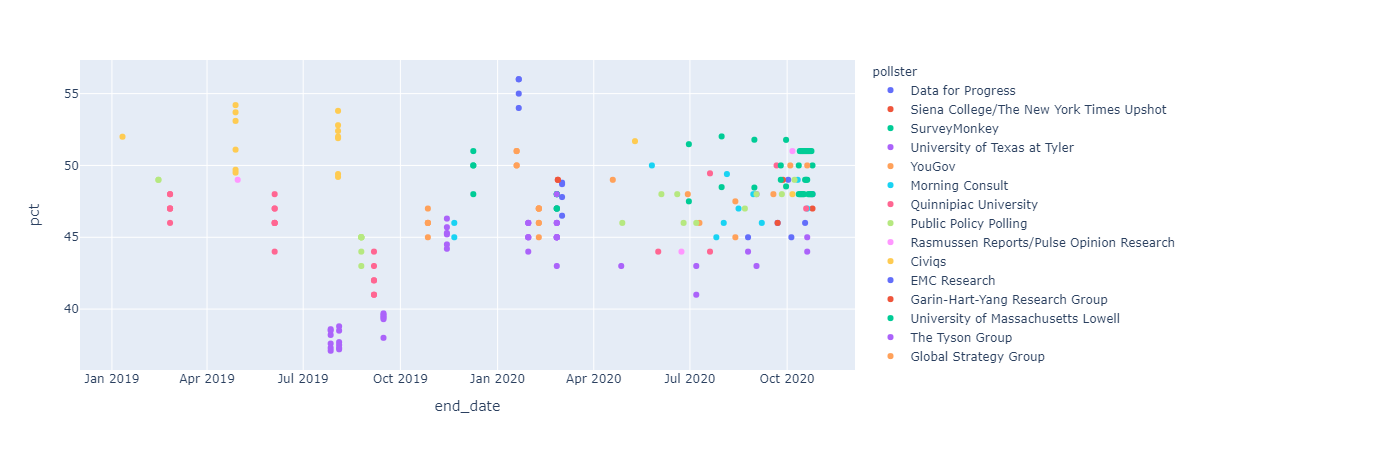

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [39]:
jb_tx_scatter.show() + djt_tx_scatter.show()